**Import the require library**

pip install os<br/>
pip install mne<br/>
pip install numpy<br/>
pip install scipy<br/>
pip install matplotlib<br/>

In [1]:
import mne
import warnings
import numpy as np
import matplotlib.pyplot as plt
from Functions import Data_path, Plot_data, Filtering, Common_average_reference

**Step 1.1: Importing pathway files**

In [2]:
folder_path = "D:\GitHub\SSVEP-based-EEG-signal-processing\Data" # Define the base folder path where the data is located
path_files, files, folders = Data_path.data_path(folder_path, data_format="gdf") 
path_files

['D:\\GitHub\\SSVEP-based-EEG-signal-processing\\Data\\Subject2-[2012.04.07-19.27.02].gdf',
 'D:\\GitHub\\SSVEP-based-EEG-signal-processing\\Data\\Subject2-[2012.04.07-19.36.29].gdf',
 'D:\\GitHub\\SSVEP-based-EEG-signal-processing\\Data\\Subject2-[2012.04.07-19.44.23].gdf',
 'D:\\GitHub\\SSVEP-based-EEG-signal-processing\\Data\\Subject2-[2012.04.07-19.57.52].gdf',
 'D:\\GitHub\\SSVEP-based-EEG-signal-processing\\Data\\Subject3-[2012.04.07-18.17.50].gdf',
 'D:\\GitHub\\SSVEP-based-EEG-signal-processing\\Data\\Subject3-[2012.04.07-18.27.18].gdf',
 'D:\\GitHub\\SSVEP-based-EEG-signal-processing\\Data\\Subject3-[2012.04.07-18.45.34].gdf',
 'D:\\GitHub\\SSVEP-based-EEG-signal-processing\\Data\\Subject3-[2012.04.07-18.53.10].gdf',
 'D:\\GitHub\\SSVEP-based-EEG-signal-processing\\Data\\Subject4-[2012.04.08-16.06.48].gdf',
 'D:\\GitHub\\SSVEP-based-EEG-signal-processing\\Data\\Subject4-[2012.04.08-16.19.25].gdf',
 'D:\\GitHub\\SSVEP-based-EEG-signal-processing\\Data\\Subject4-[2012.04.08-16.2

**Step 1.2: Load data, channel locations, labels & events**<br/>
Label_01 ---> 13Hz stimulation (33025)<br/>
Label_02 ---> 21Hz stimulation (33026)<br/>
Label_03 ---> 17Hz stimulation (33027)<br/>
Rest ---> 33024

In [3]:
warnings.filterwarnings("ignore", message="Omitted .* annotation.*")
raw = mne.io.read_raw_gdf(path_files[15], verbose=0)  # Read the data from the GDF file into a raw MNE object
channels_name = raw.ch_names                          # Extract the channel names from the raw data
data = raw.get_data().T                               # Get the EEG data and transpose it to have channels as rows and samples as columns
fs = raw.info['sfreq']                                # Get the sampling frequency of the EEG data
labels = raw.annotations.description                  # Define labels for each stimulation frequency
events, event_ind = mne.events_from_annotations(raw, verbose=0)  # Get the start time of each trial from the annotations

In [4]:
print(f"data: {data}, \n channels_name: {channels_name}, \n labels: {labels}, \n events: {events}, \n event_ind:{event_ind}")

data: [[-6.87897820e-09 -5.40146426e-08 -3.24311263e-08 ... -2.67877873e-08
  -3.37878294e-08 -3.34574429e-08]
 [-1.15408906e-09 -5.72896421e-08 -3.53725188e-08 ... -2.10876130e-08
  -3.49065316e-08 -3.12117733e-08]
 [ 1.10397730e-08 -3.01452278e-08 -9.24870830e-09 ...  9.76306452e-09
  -9.53920374e-09  2.10303927e-08]
 ...
 [ 9.18715631e-09  1.44861605e-08  5.32179773e-09 ...  1.21280305e-08
   1.24417824e-08  1.88150699e-08]
 [ 4.79858082e-09 -7.63151042e-09 -1.78757821e-08 ... -1.80404453e-08
  -6.27380277e-09 -2.46568457e-08]
 [ 4.64672699e-09 -1.93605783e-08 -1.88764620e-08 ... -1.71005230e-08
   5.59351091e-10 -1.99530782e-08]], 
 channels_name: ['Oz', 'O1', 'O2', 'PO3', 'POz', 'PO7', 'PO8', 'PO4'], 
 labels: ['32769' '33024' '32779' '32780' '33026' '32779' '32780' '33027' '32779'
 '32780' '33025' '32779' '32780' '33026' '32779' '32780' '33025' '32779'
 '32780' '33024' '32779' '32780' '33027' '32779' '32780' '33025' '32779'
 '32780' '33026' '32779' '32780' '33027' '32779' '32780'

**Step 2.1: Split trials for a single dataset**

In [16]:
time_trial = 5                          # Define the duration of each trial in seconds
time_start_trial = events[:, 0]         # Extract the start time of each trial from the events                   
duration_trial = int(fs * time_trial)   # Calculate the duration of each trial in samples based on the sampling frequency (Fs * time each trial)
lab = ['33025', '33026', '33027']       # Define the labels for the current iteration

for i in range(3):                      # Loop through the labels of interest
    num_trials = np.where(labels == lab[i])[0] # Find the indices of trials with the current label
    # Initialize an array to store trial data for the current label
    data_trial = np.zeros((duration_trial, len(channels_name), len(num_trials))) 
    for j, trial_index in enumerate(num_trials): # Iterate over each trial index and extract the corresponding data
        data_trial[:, :, j] = data[time_start_trial[trial_index]:time_start_trial[trial_index] + duration_trial, :]
    exec(f'data_trial_{i + 1} = data_trial')    # Using exec to dynamically create variable names for each trial's data array

print(f"data_trial_1: {data_trial_1.shape} \ndata_trial_2: {data_trial_2.shape} \ndata_trial_3: {data_trial_3.shape}")

data_trial_1: (1280, 8, 10) 
data_trial_2: (1280, 8, 10) 
data_trial_3: (1280, 8, 10)


**Step 2.2: Split trials for all datasets**

In [6]:
data1, data2, data3 = [], [], []
lab = ['33025', '33026', '33027']       # Define the labels for the current iteration
duration_trial = int(fs * time_trial)   # Calculate the duration of each trial in samples based on the sampling frequency (Fs * time each trial)

for i in range(len(path_files)):
    raw = mne.io.read_raw_gdf(path_files[i], verbose=0) # Read the data from the GDF file into a raw MNE object
    data = raw.get_data().T                             # Get the EEG data and transpose it to have channels as rows and samples as columns
    labels = raw.annotations.description                # Define labels for each stimulation frequency
    events, _ = mne.events_from_annotations(raw, verbose=0) # Get the start time of each trial from the annotations
    time_start_trial = events[:, 0]                     # Extract the start time of each trial from the events  

    for j in range(3):                                # Loop through the labels of interest
        num_trials = np.where(labels == lab[j])[0]    # Find the indices of trials with the current label
        # Initialize an array to store trial data for the current label
        data_trial = np.zeros((duration_trial, len(channels_name), len(num_trials))) 

        for ind, trial_index in enumerate(num_trials):  # Iterate over each trial index and extract the corresponding data
            data_trial[:, :, ind] = data[time_start_trial[trial_index]:time_start_trial[trial_index] + duration_trial, :]

        if j == 0:
            data1.append(data_trial)
        elif j == 1:
            data2.append(data_trial)
        elif j == 2:
            data3.append(data_trial)

# Concatenate the lists of data arrays along the third axis
data1 = np.concatenate(data1, axis=2)
data2 = np.concatenate(data2, axis=2)
data3 = np.concatenate(data3, axis=2)

print(f"data1.shape: {data1.shape} \ndata2.shape: {data2.shape} \ndata3.shape: {data3.shape}")

data1.shape: (1280, 8, 160) 
data2.shape: (1280, 8, 160) 
data3.shape: (1280, 8, 160)


**Step 2.3: Plot data (** *Plot a trial for one of the stimulation frequencies* **)**<br/>

*Input parameters:*
 - `data:` EEG data to be plotted
 - `fs:` Sampling frequency of the EEG data
 - `channels:` Names of the EEG channels
 - `first_point:` Index of the first data point to plot (optional, defaults to 0)
 - `last_point: `Index of the last data point to plot (optional, defaults to 3000)
 - `val_ylim:` Maximum absolute y-axis limit for the plot (optional, defaults to 2.7)
 - `size_fig:` Size of the figure (optional, defaults to (5, 5))
 - `title:` Title of the plot (optional, defaults to 'Raw data')
 - `display_figure:` Whether to display the figure ('on' or 'off') (optional, defaults to 'on')

In [ ]:
title = f'Raw data; Freq stimulation={13}Hz; Trial {0}'
Plot_data.plot_data(data1[:, :, 0], fs, channels_name, first_point=10000, last_point=15000, val_ylim=2.7, size_fig=(5,5), title=title, 
                    display_figure="on")  # Plot EEG data using the Plot_data.plot_data function

**Step 2.3: Filtering (** *Filter a trial for one of the stimulation frequencies* **)**<br/>

*Input parameters:*
 - `data:` EEG data to be filtered
 - `f_low:` Lower cutoff frequency of the bandpass filter
 - `f_high:` Upper cutoff frequency of the bandpass filter
 - `order:` Filter order
 - `fs:` Sampling frequency of the EEG data (optional, if not provided, it is assumed to be fs)
 - `type_filter:` Type of filter ('low', 'high', 'bandpass', or 'bandstop') (optional, defaults to 'bandpass')

In [12]:
from scipy import signal

# ================================================ Filtering =============================================================  
# Function to apply digital filtering to data
def filtering(data1, f_low, f_high, order, fs, notch_freq, quality_factor, notch_filter="on", type_filter='bandpass'): 
    # ------------------------------------ Normalize frequency values ------------------------------------
    f_low = f_low / (fs / 2)     
    f_high = f_high / (fs / 2)
    # -------------------------- Convert data to ndarray if it's not already -----------------------------
    if type(data).__name__ != 'ndarray': 
        data = np.array(data)
    # ------------------------ Transpose data if it has more rows than columns ---------------------------
    if data.ndim == 2 and data.shape[0] > data.shape[1]: 
        data = data.T
    elif data.ndim == 3 and data.shape[0] > data.shape[2]:
        data = data.T
    # --------------------- Design Butterworth filter based on the specified type ------------------------
    if type_filter == "low":     
        b, a = signal.butter(order, f_low, btype='low')
    elif type_filter == "high":
        b, a = signal.butter(order, f_high, btype='high')
    elif type_filter == "bandpass":
        b, a = signal.butter(order, [f_low, f_high], btype='bandpass')
    elif type_filter == "bandstop":
        b, a = signal.butter(order, [f_low, f_high], btype='bandstop')
        
    b1, a1 = signal.iirnotch(notch_freq, quality_factor, fs) # Design a notch filter using signal.iirnotch
    # ------------------------------------------- Notch filter -------------------------------------------
    if data.ndim == 3:
        for i in range(data.shape[0]):
            if notch_filter == "on":     
                data[i, :, :] = signal.filtfilt(b1, a1, data[i, :, :])
            # ----------- Apply the digital filter using filtfilt to avoid phase distortion --------------
            # data[i, :, :] = signal.filtfilt(b, a, data[i, :, :])
    elif data.ndim < 3:
        # ----------------------------------------- Notch filter -----------------------------------------
        if notch_filter == "on":     
            data = signal.filtfilt(b1, a1, data)
        # ------------- Apply the digital filter using filtfilt to avoid phase distortion ----------------    
        # data = signal.filtfilt(b, a, data) 
    # ------------------------ Transpose data if it has more columns than rows ---------------------------
    if data.ndim == 2 and data.shape[0] < data.shape[1]: 
        data = data.T
    elif data.ndim == 3 and data.shape[0] < data.shape[2]:
        data = data.T
        
    return data

In [ ]:
# Define parameters for filtering
f_low = 0.05
f_high = 100
order = 5
notch_freq = 50      # Frequency to be removed from signal (Hz)
quality_factor = 20  # Quality factor
title = f'Filtered data; Freq stimulation=13Hz; Trial {1}'
# Apply bandpass filtering to the EEG data using the Filtering.filtering function
data_filtered = Filtering.filtering(data1, f_low, f_high, order, fs, notch_freq, quality_factor, notch_filter="on", type_filter='bandpass')
Plot_data.plot_data(data_filtered[:, :, 0], fs, channels_name, first_point=0, last_point=3000, val_ylim=2.7, size_fig=(5,5), title=title, 
                    display_figure="on")

**Step 3: Fourier transform for a channel**

Text(0.5, 0, 'F(Hz)')

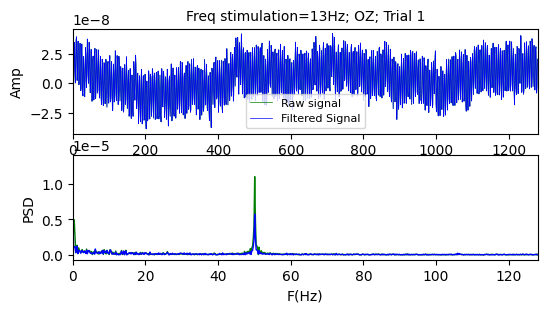

In [11]:
# Perform Fourier transform on the first channel of the first trial
x_fft = np.fft.fft(data1[:, 0, 0])
x_psd = np.abs(x_fft[:len(x_fft)//2]) # Calculate the one-sided power spectral density (PSD)
x_filter_fft = np.fft.fft(data_filtered[:, 2, 0]) # Perform Fourier transform on the filtered signal
x_filter_psd = np.abs(x_filter_fft[:len(x_filter_fft)//2])
f = np.linspace(0, fs/2, len(x_fft)//2)  # Create a frequency axis

# Plot Result 
plt.figure(figsize=(6, 3))
plt.subplot(2, 1, 1)
plt.plot(data1[:, 0, 0],'g-', linewidth=0.5, label="Raw signal")
plt.plot(data_filtered[:, 0, 0],'b-', linewidth=0.5, label="Filtered Signal")
plt.xlim([0, len(data1[:, 0, 0])])
plt.ylabel('Amp', fontsize=10)
plt.title('Freq stimulation=13Hz; OZ; Trial 1', fontsize=10)
plt.legend(fontsize=8)

plt.subplot(2, 1, 2)
plt.plot(f, x_psd, 'g-', linewidth=1)
plt.plot(f, x_filter_psd, 'b-', linewidth=1)
plt.xlim([0, f[-1]])
plt.ylabel('PSD', fontsize=10)
plt.xlabel('F(Hz)', fontsize=10)

**Step 1.4: CAR filter**

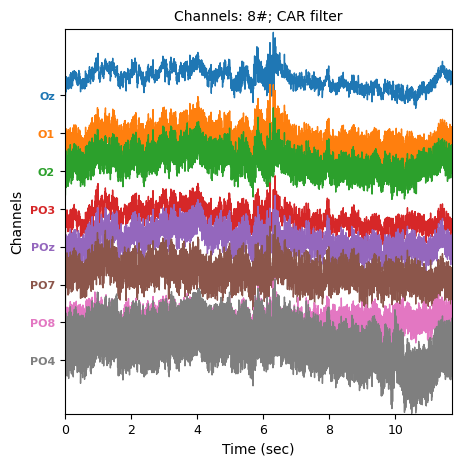

In [25]:
data_car = Common_average_reference.car(data_filtered[:,:,1]) # Apply common average reference (CAR) to the EEG data using the Common_average_reference.car function
Plot_data.plot_data(data, fs, channels_name, first_point=0, last_point=3000, val_ylim=2.7, size_fig=(5,5), title='CAR filter', 
                    display_figure="on")

**Step 3: CCA Method**

In [ ]:
x = data_trial_1[:,:,1]           # (number samples, number channel, number trials)
num_harmonic = 2                  # Number of harmonic for each frequency stimulation
num_channel = [1, 4]              # Number of Channel
f_stim = [13, 21, 17]             # Freqquencies stimuation
num_sample_neigh = 20             # Number of samples neighborhood for each frequency stimulation
num_samples_trial = int(fs * duration_trial)            
time = np.linspace(0, duration_trial, num_samples_trial)  # Time vector

f_low, f_high, order = 5, 50, 3    # Define filter parameters
data = Filtering.filtering(x, f_low, f_high, order, fs, type_filter='bandstop') # Apply bandstop filtering to the EEG data 

f_high, order = min(f_stim) - 1, 3    # Define filter parameters
data = Filtering.filtering(x, f_low, f_high, order, fs, type_filter='high') # Apply high filtering to the EEG data 

In [55]:
from scipy.linalg import canoncorr
f_ref = np.zeros(len(f_stim))
for i in range(len(f_stim)):  # First loop for frequencies stimulation
    data_ref = np.zeros((len(time), 2 * num_harmonic))
    for j in range(num_harmonic):  # Second loop creates a reference signal for each frequency stimulation
        signal_ref = np.zeros((len(time), 2))
        signal_ref[:, 0] = np.sin(2 * np.pi * (j + 1) * f_stim[i] * time)
        signal_ref[:, 1] = np.cos(2 * np.pi * (j + 1) * f_stim[i] * time)
        data_ref[:, j * 2:(j + 1) * 2] = signal_ref
    _, _, a = canoncorr(data[:, num_channel], data_ref)
    f_ref[i] = np.max(a)
label_predic = np.argmax(f_ref)

ImportError: cannot import name 'canoncorr' from 'scipy.linalg' (c:\Users\RezaS\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\linalg\__init__.py)